# Importing and discovering the data

From this analysis, we arrived to these following conclusions, that we will list here first. To check the analysis in more detail, click the titles. 

## Conclusions

From this analysis we conclude we should take the wrangling and cleaning steps listed below. For the first version of the model we will take only the most straightforward steps and we will work on top of that. After the first wrangling we will make a more ellaborate exploratory analysis through Tableau visualizations. 

[**From ingredients table:**](#Unpacking-ing_map.pkl)

* Bin ingredients by category, by bringing lists of ingredient names into:
 - Animal protein
 - Vegetables 
 - Dairy/eggs
 - Carbs
 - Condiment/spices
 
[**From RAW_recipes (Categoricals):**](#Recipe-tables)

* Removing null row
* Substitute the ingredients from the ingredient list by the ones replaced in the ingredients table mentioned earlier.
* Create columns that show the percentage of each ingredient category in the recipe
* Nutrition column: find a way to categorize nutritional value, or use the tokenized table data 
* Description: make NLP sentiment analysis
* Tags: Find key tags that indicate difficulty, or seasonality, and create categorical data

[**From RAW_recipes (Numericals):**](#Evaluating-numerical-variables:)

* Removing ouliers, or
* Binning time 
* Test log rescaling for linear regression

[**From PP_recipes:**](#Tokenized-table)

* Merge with recipe database, to keep techniques and calorie_level, if not used the method above.
* Use ingredient_ids to also evaluate how the recipe seem like (proportion of meat vs vegetable or dairy)

[**From RAW_interactions:**](#Iteraction-tables)

* aggregations around recipe_id:
 - average rating of the recipe
 - average NLP sentiment analysis of the review
 - number of comments

* create aggregations around user_id:
 - number of recipes posted per user
 - average rating of posted recipes per user 
 - average sentiment of posted recipes per user
 - average number of recipe comments per user
 
* turn date into days after the recipe was posted

[**From PP_users:**](#Tokenized-interactions)

* No cleaning, we will not be using this data at the moment.

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Unpacking ing_map.pkl
This file has been packed using pickle, and as we can see it takes all ingredients listed in the recipes, and a simple replacement. This change will help put together the recipes by proportion of ingredients, and reduce noise to the model.  

In [2]:
infile = open("../data/ingr_map.pkl",'rb')
ingredients = pickle.load(infile)
infile.close()

In [3]:
ingredients.head()

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308


In [4]:
ingredients['replaced'].value_counts()

dressing                  163
sausage                   154
chile                      99
cake mix                   85
cheddar                    84
                         ... 
black decorating gel        1
lime oil                    1
peppar vodka                1
sesame paste                1
white balsamic vinegar      1
Name: replaced, Length: 8023, dtype: int64

**Cleaning Steps:**

* bin ingredients by category, by bringing lists of ingredient names into:
 - animal protein
 - vegetables 
 - dairy/eggs
 - carbs
 - condiment/spices
 
We could use the nutrition table, but a user reading the recipe will not know the nutritional value, but they will choose it to make it based in what the components of the recipe are. 

## Recipe tables
We will first read RAW_recipes to see what the dataset is giving us

In [5]:
recipes = pd.read_csv("../data/RAW_recipes.csv")
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [6]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


We haven't got much Nulls in the table, except for on recipe that apparently has no name

**Cleaning Steps:**
* Removing null row
* substitute the ingredients from the ingredient list by the ones replaced in the ingredients table mentioned earlier.
* create columns that show the percentage of each ingredient category in the recipe

### a recipe entry example

In [7]:
recipes.loc[2]

name                                      all in the kitchen  chili
id                                                           112140
minutes                                                         130
contributor_id                                               196586
submitted                                                2005-02-25
tags              ['time-to-make', 'course', 'preparation', 'mai...
nutrition                [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]
n_steps                                                           6
steps             ['brown ground beef in large pot', 'add choppe...
description       this modified version of 'mom's' chili was a h...
ingredients       ['ground beef', 'yellow onions', 'diced tomato...
n_ingredients                                                    13
Name: 2, dtype: object

### Deciphering nutritional value

In order to figure what the nutrition is about, we search in food.com the recipe, and after pressing print, we can see a nutritional table is included in the printout. It looks like this:

![nutritionaltable](../images/nutritional-info-moms-chilli.png)

so the nutrition list corresponds to: 
* Calories per serving
* % daily fats
* % daily sugars
* % daily sodium
* % daily protein
* % daily saturated fat
* % daily total carbohydrates

**Cleaning Steps:**
* Find a way to categorize nutritional value, or use the tokenized table data (see under)

### Descriptions
We could analyse the sentiment of the description, to see if it affects how much it correlates with the rating or user engagement, as i assume it is read beffore jumping into attempting the recipe

In [8]:
recipes.loc[0,'description']

'autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.'

**Cleaning Steps:**
* make NLP sentiment analysis

### Tags
These tags can be used to find up about trends later in the visualizations, allow also to create categories, like easy/hard or if it's seasonal or not

In [9]:
recipes.loc[0,'tags']

"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']"

**Cleaning Steps:**
* Find key tags that indicate difficulty, or seasonality, and create categorical data

### Evaluating numerical variables

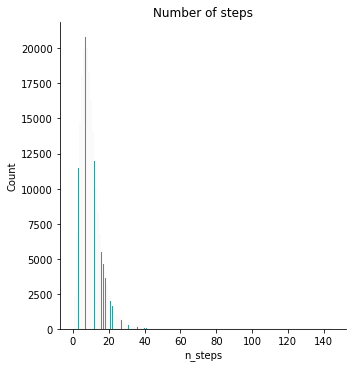

In [10]:
sns.displot(recipes['n_steps'], color='teal').set(title="Number of steps");

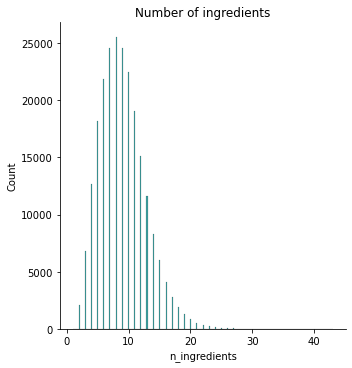

In [11]:
sns.displot(recipes['n_ingredients'], color='teal').set(title="Number of ingredients");

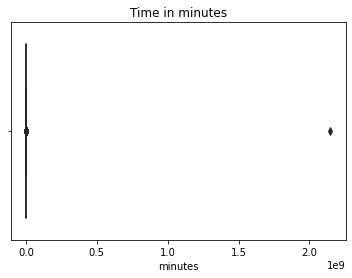

In [12]:
sns.boxplot(data=recipes, x='minutes', color = 'teal').set(title="Time in minutes");

**Cleaning Steps:**
* Removing ouliers, or
* Binning time 
* Test log rescaling for linear regression

### Tokenized table 

In [13]:
tokens = pd.read_csv("../data/PP_recipes.csv")
tokens.head()

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


From this table we can use ingredient_ids to directly know which ingredients the recipe use. We could use calorie_level in the first run of our model, as it has been already clasified for us.

Regarding the techniques, unfortunately we don't have the information to what each of them corresponds, but this string is already codified and ready to feed a model if we wanted to. We can try to add them to the data and see if it improves accuracy. If is it not the case, we will also extract verbs from the step by step in the recipes, quantify them and feed it to the model. 

We can also see that not all recipes have been included in this tokenized list. If this information is useful for the model, we might take only the recipes that are further analyzed here.

**Cleaning Steps:**
* Merge with recipe database, to keep techniques and calorie_level, if not used the method above.
* Use ingredient_ids to also evaluate how the recipe seem like (proportion of meat vs vegetable or dairy)


## Interaction tables

In [14]:
interactions = pd.read_csv("../data/RAW_interactions.csv")
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


From this table we can calculate how many interactions each recipe receive. With the recipe table we can also calculate how many comments each posting user received per recipe, and calculate an average to see how popular each posting user is. 

In the same way, we can try to see if users who post also are active commenting. 

In [15]:
interactions.recipe_id.value_counts()

2886      1613
27208     1601
89204     1579
39087     1448
67256     1322
          ... 
48639        1
36345        1
13806        1
30182        1
109109       1
Name: recipe_id, Length: 231637, dtype: int64

In [16]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


**Cleaning Steps:**
* aggregations around recipe_id:
 - average rating of the recipe
 - average NLP sentiment analysis of the review
 - number of comments

* create aggregations around user_id:
 - number of recipes posted per user
 - average rating of posted recipes per user 
 - average sentiment of posted recipes per user
 - average number of recipe comments per user
 
* turn date into days after the recipe was posted


### Tokenized interactions
Unfortunately, as the dataset did not come with a description on how these tokenized tables have been created, I am unable ar the moment to extract useful information from PP_users. I assumed these were interactions grouped by users, and if is it so, the index column lacks the user ID, so i can't relate the tables with this information. 

In [17]:
i_tokens = pd.read_csv("../data/PP_users.csv")
i_tokens

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376
...,...,...,...,...,...,...
25071,25071,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[144172, 154054]",2,"[5.0, 5.0]",2
25072,25072,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[162436, 148228]",2,"[5.0, 5.0]",2
25073,25073,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[162681, 172034]",2,"[5.0, 5.0]",2
25074,25074,"[2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[157808, 159896]",2,"[5.0, 5.0]",2
